In [22]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Load the Wine Quality Red dataset
file = pandas.read_csv("../datasets/Position_Salaries.csv")

X = file.iloc[:,1:2]
y = file.iloc[:,2:3]

# Split the dataset into an 80-20 training-test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [23]:
# create the model
regressor = LinearRegression()

# train the model
regressor.fit(X_train,y_train)

# predict by test results
y_pred = regressor.predict(X_test)

In [24]:
# print the predicted results with nice looking output

# displaying the headings
headings = ['Data to test', 'Actual', 'Predicted']
print('{:<20} {:<20} {:<20}'.format(*headings))

# displaying the data
data_comparison = np.concatenate((X_test, y_test, y_pred), axis=1)
for row in data_comparison:
    print('{:<20.2f} {:<20.2f} {:<20.2f}'.format(*row))

Data to test         Actual               Predicted           
3.00                 60000.00             70675.68            
10.00                1000000.00           408851.35           


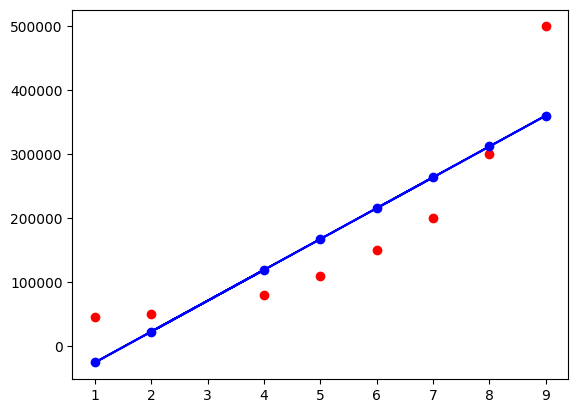

In [25]:
# graph for linear regresstion

# actual 
plt.scatter(X_train,y_train,color='red')

# predicted
plt.scatter(X_train,regressor.predict(X_train),color='blue')
plt.plot(X_train,regressor.predict(X_train),color='blue')

# Polynomial Regression Starts From Here :

In [26]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.fit_transform(X_test)

# train the model to polynomial X values
regressor2 = LinearRegression()
regressor2.fit(X_poly_train,y_train)
# the model will train for three data for degree = 2, eqn : (bx^0+bx^1+bx^2) & if degree = 3 eqn : (bx^0+bx^1+bx^2+bx^3) and so on
# for degree 2, if X is 7 then its converted to [ 1.  7. 49.] that is (7^0,7^1,7^2)


# predict for polynomial values (regressor2 is polynomial linear regressor)
# below predict value will take data in the form of [[x^0,x^1,x^2]] 
y_pred_poly_train = regressor2.predict(X_poly_train)
y_pred_poly_test = regressor2.predict(X_poly_test)

print(X_poly_test)
print(y_pred_poly_test)

[[  1.   3.   9.]
 [  1.  10. 100.]]
[[ 36603.46695558]
 [603346.87612857]]


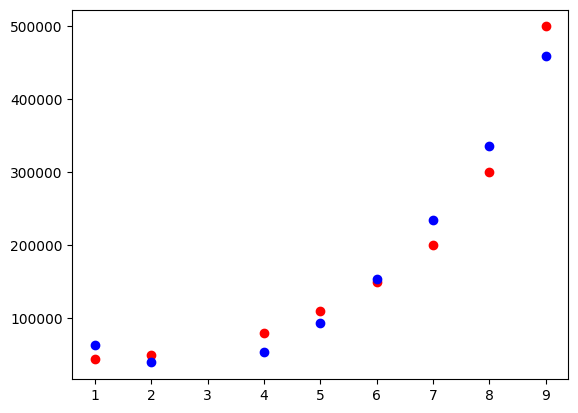

In [27]:
# original data
plt.scatter(X_train,y_train,color='red')

# polynomial prediction with X train & Y train 
plt.scatter(X_train,y_pred_poly_train,color='blue')

In [28]:
# testing a single value for the polynomial model

print(regressor2.predict([[ 1.,  7., 49.]]))

[[234389.6713615]]
